# exomic growth predictiopn


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
unemployment_df=pd.read_csv('unemployment_data.CSV')
cpi_df=pd.read_csv('cpi_data.csv')
gdp_df=pd.read_csv('gdp_data.csv')

<Axes: >

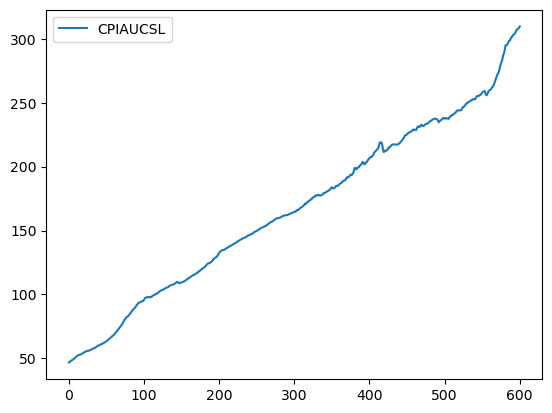

In [105]:
cpi_df.plot()

<Axes: >

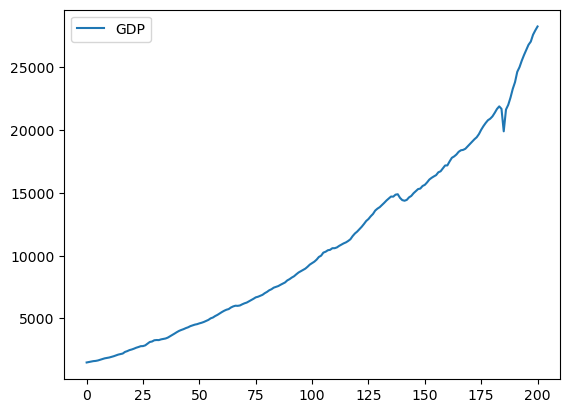

In [106]:
gdp_df.plot()

# getting to know data

In [107]:

unemployment_df.isna().sum()

DATE      0
UNRATE    0
dtype: int64

In [108]:
unemployment_df.shape

(601, 2)

In [109]:
cpi_df.isna().sum()

DATE        0
CPIAUCSL    0
dtype: int64

In [110]:
gdp_df.isna().sum()


DATE    0
GDP     0
dtype: int64

In [111]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    601 non-null    object 
 1   UNRATE  601 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


# unemployment

In [112]:
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    601 non-null    object 
 1   UNRATE  601 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.5+ KB


# feature Extraction 

In [113]:
unemployment_df['Dates']=unemployment_df['DATE']

In [114]:
unemployment_df['DATE'] = pd.to_datetime(unemployment_df['DATE'])

In [115]:
unemployment_df['Year']=unemployment_df['DATE'].dt.year
unemployment_df['Month']=unemployment_df['DATE'].dt.month
unemployment_df['day']=unemployment_df['DATE'].dt.day

unemployment_df['Name_week']=unemployment_df['DATE'].dt.day_name()

In [116]:
unemployment_df.sample(5)

,DATE,UNRATE,Dates,Year,Month,day,Name_week
342,2002-07-01,5.8,2002-07-01,2002,7,1,Monday
378,2005-07-01,5.0,2005-07-01,2005,7,1,Friday
91,1981-08-01,7.4,1981-08-01,1981,8,1,Saturday
496,2015-05-01,5.6,2015-05-01,2015,5,1,Friday
80,1980-09-01,7.5,1980-09-01,1980,9,1,Monday


In [117]:
unemployment_df.set_index('DATE',inplace=True)

# Visual Representation of Data

<Axes: xlabel='DATE'>

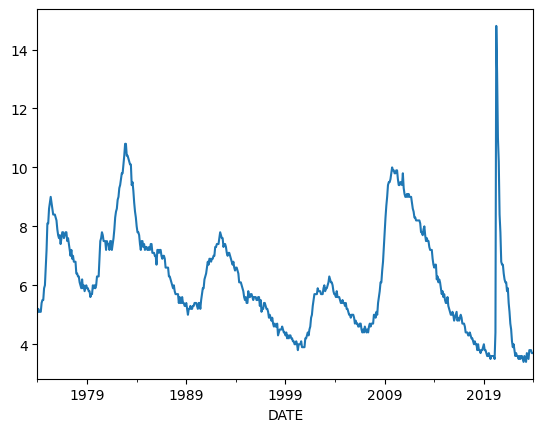

In [118]:
unemployment_df['UNRATE'].plot()

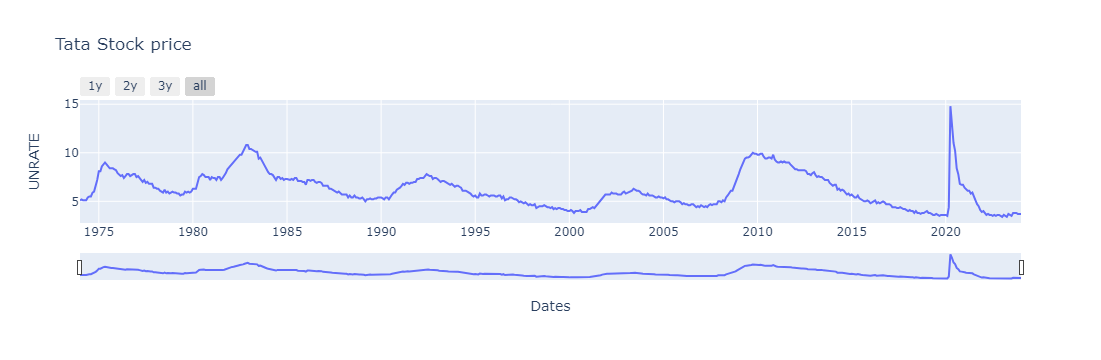

In [119]:
import plotly.express as px
fig = px.line(unemployment_df, x='Dates', y='UNRATE', title='Tata Stock price')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

# seasonal decompose

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(unemployment_df['UNRATE'], period=1,model='additive')

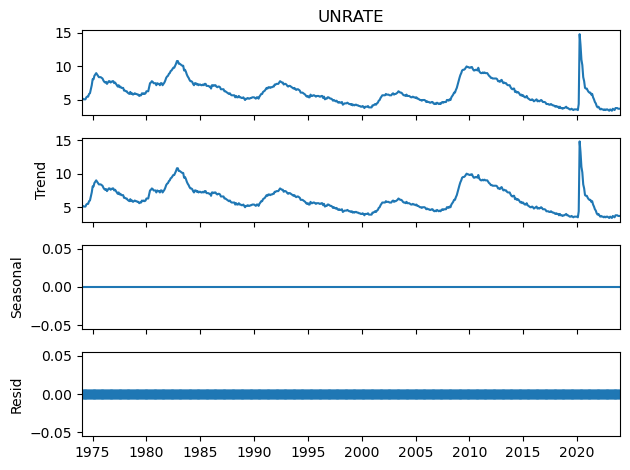

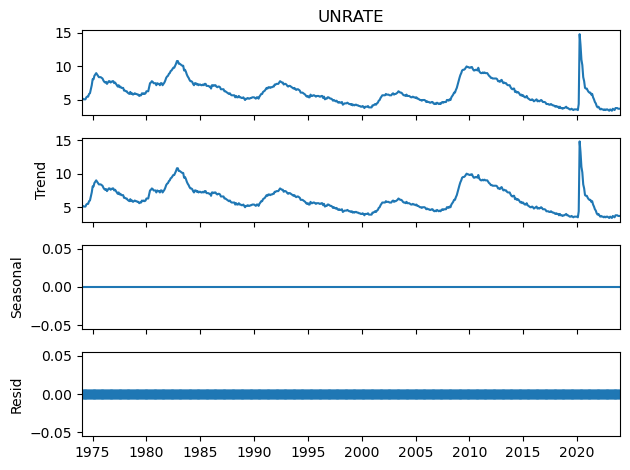

In [121]:
result.plot()

# ADF test

In [122]:
from statsmodels.tsa.stattools import adfuller

In [123]:
adf_result=adfuller(unemployment_df['UNRATE'])

In [124]:
print('ADF Statistic: %f' % adf_result[0])
print('p-value: %f' % adf_result[1])
print('Critical Values:')
for key, value in adf_result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.144841
p-value: 0.023408
Critical Values:
	1%: -3.441
	5%: -2.866
	10%: -2.569


In [125]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [126]:
series_diff=unemployment_df['UNRATE']

# ACF and PacF

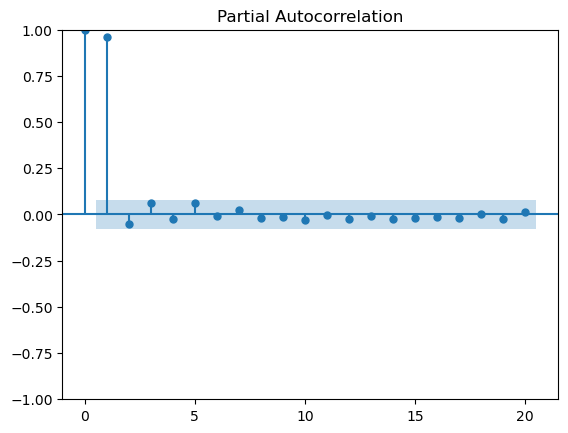

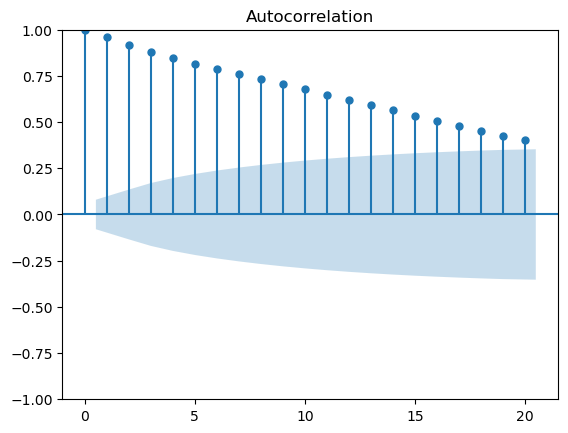

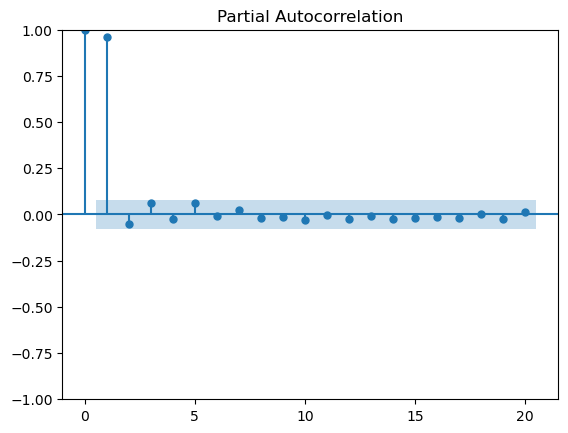

In [127]:
plot_acf(series_diff, lags=20)
plot_pacf(series_diff, lags=20)

Time Series Decompositio





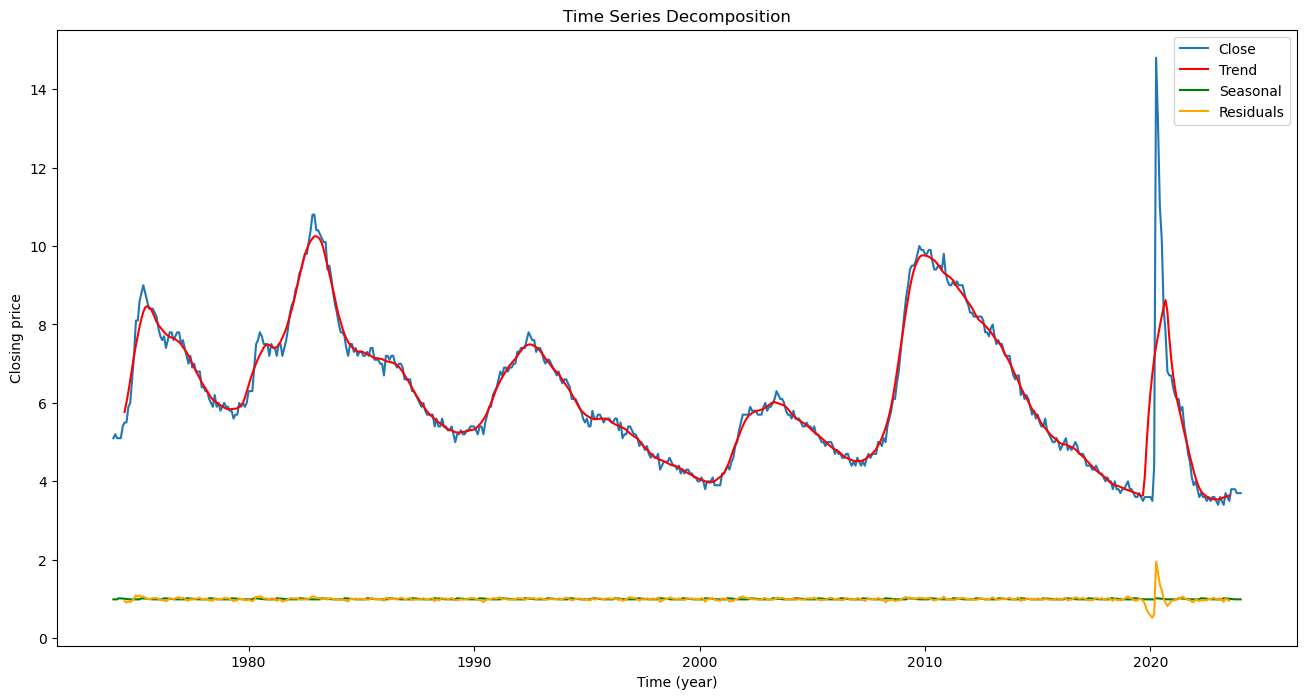

In [128]:
result = seasonal_decompose(unemployment_df['UNRATE'], model='multiplicative')
# Assuming daily data with 252 trading days in a year


print('Time Series Decompositio')
print('\n\n')

# Plot the original time series data
plt.figure(figsize=(16, 8))
plt.plot(unemployment_df['UNRATE'], label='Close')

# Plot the trend component
plt.plot(result.trend, label='Trend', color='red')

# Plot the seasonal component
plt.plot(result.seasonal, label='Seasonal', color='green')

# Plot the re
plt.plot(result.resid, label='Residuals', color='orange')

plt.title('Time Series Decomposition')
plt.xlabel("Time (year)")
plt. ylabel ("Closing price")
plt.legend(loc='best')
plt.show()

<Axes: ylabel='Frequency'>

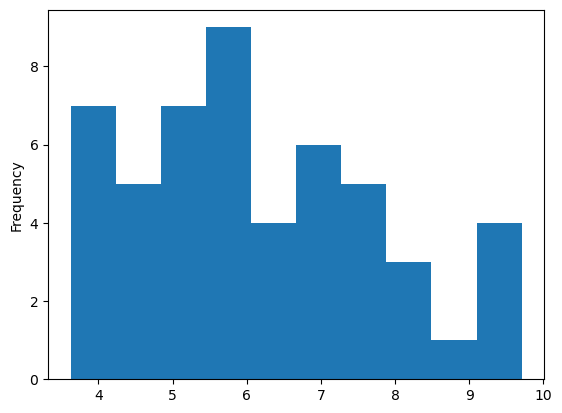

In [129]:
unemployment_df.groupby('Year')['UNRATE'].mean().plot.hist()

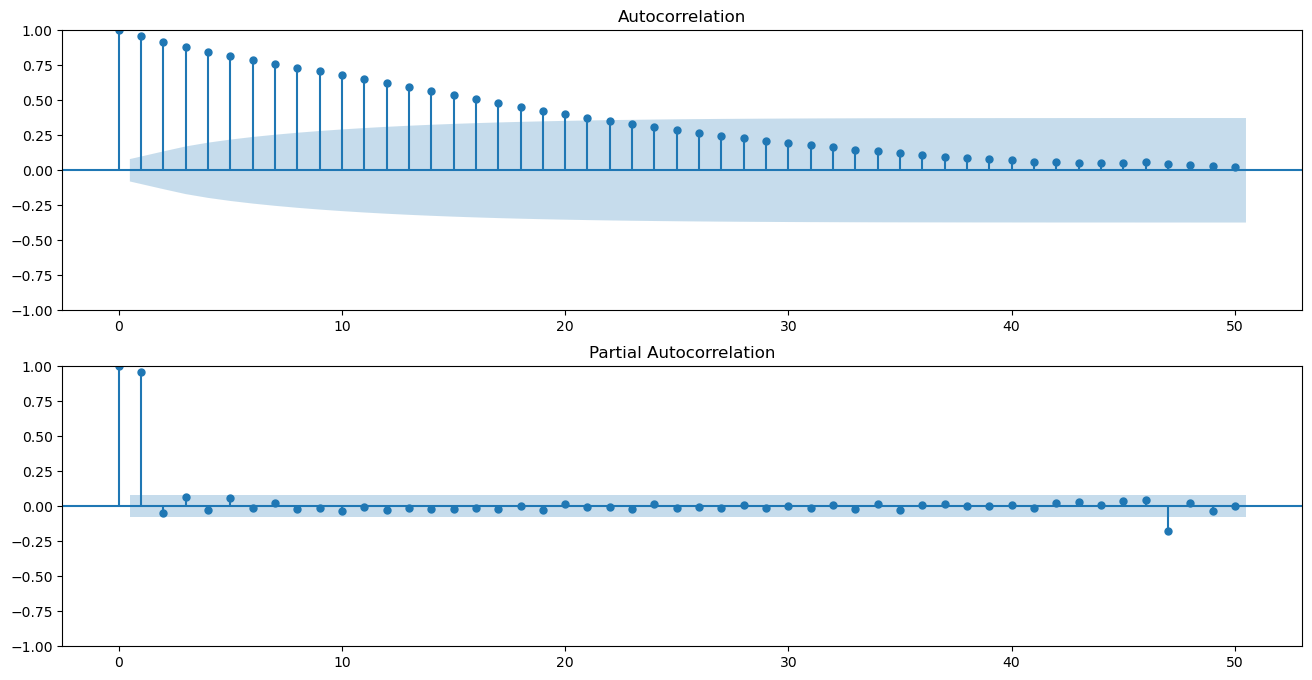

In [130]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 8))

plot_acf(unemployment_df['UNRATE'], lags=50, ax=ax[0])
plot_pacf(unemployment_df['UNRATE'], lags=50, ax=ax[1])

plt.show()

# train test split

In [131]:
series=unemployment_df['UNRATE']

In [132]:
train_size=int(len(series)*0.80)

In [133]:
train_data,test_data=series[0:train_size],series[train_size:]

In [134]:
start=len(train_data)

In [135]:
start

480

In [136]:
end=len(train_data)+len(test_data)-1

In [137]:
end

600

# ARIMA Model

In [237]:
from statsmodels.tsa.arima.model import ARIMA

In [139]:
 model=ARIMA(train_data,order=(2,1,20))

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [140]:
model_fit=model.fit()

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [141]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 UNRATE   No. Observations:                  480
Model:                ARIMA(2, 1, 20)   Log Likelihood                 199.561
Date:                Mon, 12 Aug 2024   AIC                           -353.122
Time:                        08:29:00   BIC                           -257.173
Sample:                    01-01-1974   HQIC                          -315.403
                         - 12-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1577      0.448      0.352      0.725      -0.721       1.037
ar.L2          0.0375      0.386      0.097      0.922      -0.718       0.793
ma.L1         -0.1426      0.448     -0.319      0.750      -1.020       0.735
ma.L2          0.1005      0.386      0.260      0.795      -0.656       0.857
ma.L3          0.1982      0.080      2.464      0.014       0.041       0.356
ma.L4          0.1946      0.089      2.192      0.028       0.021       0.369
ma.L5          0.1502      0.095      1.577      0.115      -0.036       0.337
ma.L6          0.1804      0.084      2.145      0.032       0.016       0.345
ma.L7          0.1338      0.099      1.350      0.177      -0.060       0.328
ma.L8          0.1511      0.088      1.719      0.086      -0.021       0.323
ma.L9          0.0860      0.088      0.983      0.326      -0.086       0.258
ma.L10         0.0037      0.080      0.046      0.963      -0.153       0.160
ma.L11         0.1483      0.062      2.382      0.017       0.026       0.270
ma.L12        -0.1512      0.079     -1.917      0.055      -0.306       0.003
ma.L13         0.0484      0.118      0.410      0.682      -0.183       0.280
ma.L14        -0.1912      0.083     -2.299      0.022      -0.354      -0.028
ma.L15         0.0711      0.112      0.635      0.525      -0.148       0.290
ma.L16         0.0506      0.107      0.472      0.637      -0.160       0.261
ma.L17         0.0317      0.053      0.594      0.553      -0.073       0.136
ma.L18        -0.0015      0.055     -0.028      0.978      -0.108       0.105
ma.L19         0.0731      0.051      1.427      0.153      -0.027       0.173
ma.L20         0.1340      0.067      2.008      0.045       0.003       0.265
sigma2         0.0251      0.002     16.625      0.000       0.022       0.028
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                34.12
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               0.54   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [142]:
model_pred=model_fit.predict(start=start,end=end,type='levels')

C:\Users\lenovo\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning:

Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.



In [143]:
test_data.tail()

DATE
2023-09-01    3.8
2023-10-01    3.8
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
Name: UNRATE, dtype: float64

In [144]:
test_data.shape

(121,)

<Axes: >

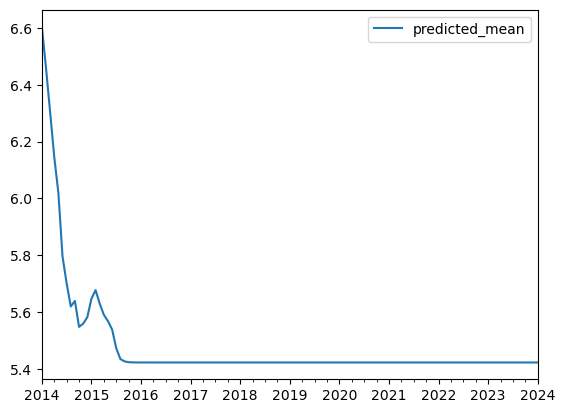

In [145]:
model_pred.plot(legend=True)

In [146]:
forecast_period = 121 # Number of months to forecast
forecast_index = pd.date_range(start='2014-01-01', periods=forecast_period, freq='M')

In [147]:
forecast = model_fit.get_forecast(steps=forecast_period)

In [148]:
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [149]:
forecast_series = pd.Series(forecast_values)
forecast_series = pd.DataFrame(forecast_series)

In [150]:
print(forecast_series)

            predicted_mean
2014-01-01        6.605062
2014-02-01        6.460039
2014-03-01        6.303778
2014-04-01        6.145935
2014-05-01        6.019127
...                    ...
2023-09-01        5.421997
2023-10-01        5.421997
2023-11-01        5.421997
2023-12-01        5.421997
2024-01-01        5.421997

[121 rows x 1 columns]


# ARIMA Forecasting

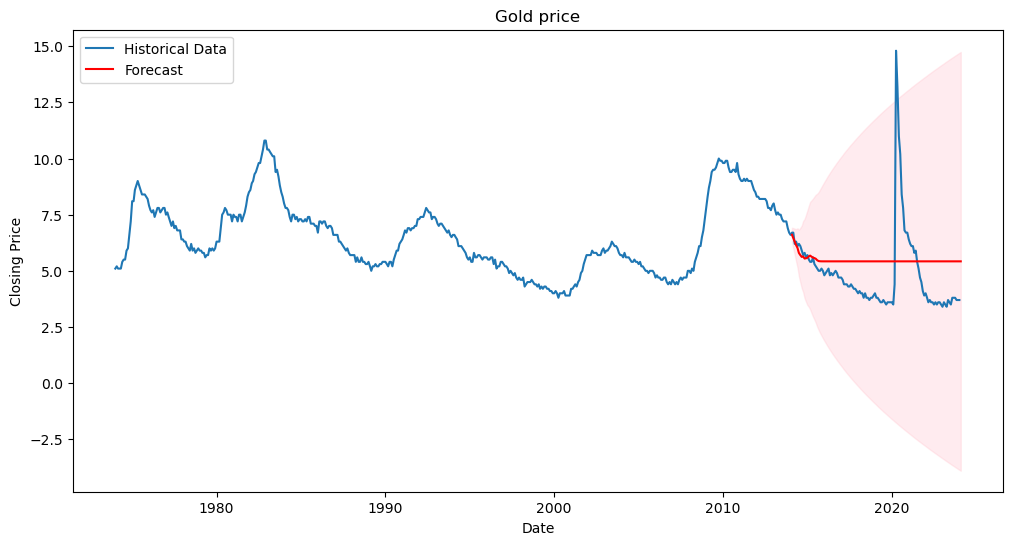

In [151]:
plt.figure(figsize=(12, 6))
plt.plot(unemployment_df.index, unemployment_df['UNRATE'], label='Historical Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.fill_between(forecast_index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title('Gold price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [152]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error
rmse = mean_squared_error(test_data, forecast_values[:len(test_data)], squared=False)
print('\n\n')
print(f'Root Mean Squared Error: {rmse}')




Root Mean Squared Error: 1.8269551511757707


C:\Users\lenovo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



# AUTO ARIMA


Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 8.787 seconds


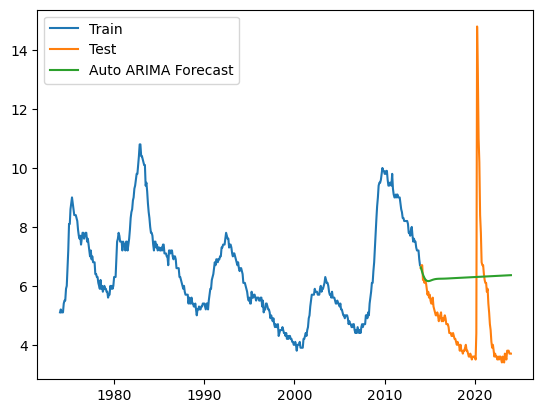

In [153]:
from pmdarima import auto_arima

# Fit auto_arima to find the best parameters
model_auto = auto_arima(train_data, 
                        seasonal=False, 
                        trace=True, 
                        error_action='ignore', 
                        suppress_warnings=True,
                        stepwise=False,
                        start_p=2, max_p=4,  # p can go up to 4
                        d=None,  # Let auto_arima decide between 0 and 1
                        start_q=1, max_q=25,  # q can go up to 25
                        start_d=0, max_d=1,n_jobs=-1)

# Fit the ARIMA model with the best parameters
model_auto.fit(train_data)

# Make predictions
forecast_auto = model_auto.predict(n_periods=len(test_data))
forecast_auto = pd.DataFrame(forecast_auto,index = test_data.index,columns=['Prediction'])

# Plot the results
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(forecast_auto, label='Auto ARIMA Forecast')
plt.legend(loc='best')
plt.show()


# Prophet Model

In [154]:
#! pip install prophet

In [155]:
from prophet import Prophet

In [156]:
ny_df_final=unemployment_df['UNRATE'].reset_index()

In [157]:
ny_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    601 non-null    datetime64[ns]
 1   UNRATE  601 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.5 KB


In [158]:
ny_df_final.columns=['ds','y']

In [159]:
ny_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      601 non-null    datetime64[ns]
 1   y       601 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 9.5 KB


In [160]:
# 1 year traing data

In [161]:
#train = ny_df_final.iloc[:len(ny_df_final)-121]
#test = ny_df_final.iloc[len(ny_df_final)-121:]

In [162]:
train_data = ny_df_final[ny_df_final['ds'] < '2021-01-01']
# Test on data from 2021 to 2024
test_data = ny_df_final[ny_df_final['ds'] >= '2021-01-01']

In [163]:
train_data.tail()

,ds,y
559,2020-08-01,8.4
560,2020-09-01,7.8
561,2020-10-01,6.8
562,2020-11-01,6.7
563,2020-12-01,6.7


In [164]:
#series=ny_df_final

In [165]:
#train_size=int(len(series)*0.80)

In [166]:
#train_data,test_data=series[0:train_size],series[train_size:]

In [167]:
#start=len(train_data)

In [168]:
#end=len(train_data)+len(test_data)-1

In [169]:
#m= Prophet(interval_width=0.95)

In [170]:
#m.fit(ny_df_final)

In [232]:
# for model  train on whole data
from prophet.make_holidays import make_holidays_df
changepoints = ['1985-01-01', '2000-01-01']
holidays = make_holidays_df(year_list=[1974, 2024], country='US')
m1 = Prophet(changepoint_prior_scale=0.9,seasonality_mode='multiplicative',changepoints=changepoints,holidays=holidays)
m1.add_seasonality(name='decade', period=12 * 10, fourier_order=5)
m1.fit(ny_df_final)

09:50:38 - cmdstanpy - INFO - Chain [1] start processing
09:50:38 - cmdstanpy - INFO - Chain [1] done processing


In [234]:
#pickle.dump(m1,open('fbProfet_predict_model.pkl','wb'))

# valdation Model

In [221]:
from prophet.make_holidays import make_holidays_df
changepoints = ['1985-01-01', '2000-01-01']
holidays = make_holidays_df(year_list=[1974, 2024], country='US')
m = Prophet(changepoint_prior_scale=0.9,seasonality_mode='multiplicative',changepoints=changepoints,holidays=holidays)
m.add_seasonality(name='decade', period=12 * 10, fourier_order=5)
m.fit(train_data)
future = m.make_future_dataframe(periods=len(test_data)+10,freq='M') #MS for monthly, H for hourly
forecast = m.predict(future)

09:46:27 - cmdstanpy - INFO - Chain [1] start processing
09:46:27 - cmdstanpy - INFO - Chain [1] done processing


In [222]:
future

,ds
0,1974-01-01
1,1974-02-01
2,1974-03-01
3,1974-04-01
4,1974-05-01
...,...
606,2024-06-30
607,2024-07-31
608,2024-08-31
609,2024-09-30


In [223]:
forecast_test = forecast[forecast['ds'].isin(test_data['ds'])]

In [224]:
future_forcast = m.make_future_dataframe(periods=12,freq='M')

In [225]:
future_forcast

,ds
0,1974-01-01
1,1974-02-01
2,1974-03-01
3,1974-04-01
4,1974-05-01
...,...
571,2021-07-31
572,2021-08-31
573,2021-09-30
574,2021-10-31


In [226]:
forecast = m.predict(future_forcast)

In [227]:
forecast.tail(12)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Columbus Day,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
564,2020-12-31,6.587043,5.111406,9.019832,6.587043,6.587043,0.0,0.0,0.0,0.0,...,0.066831,0.066831,0.066831,-0.024001,-0.024001,-0.024001,0.0,0.0,0.0,7.027264
565,2021-01-31,6.593156,5.161663,8.877838,6.593156,6.593156,0.0,0.0,0.0,0.0,...,0.061574,0.061574,0.061574,-0.024459,-0.024459,-0.024459,0.0,0.0,0.0,6.999121
566,2021-02-28,6.598677,5.839784,9.574930,6.598677,6.598677,0.0,0.0,0.0,0.0,...,0.172047,0.172047,0.172047,0.110254,0.110254,0.110254,0.0,0.0,0.0,7.733957
567,2021-03-31,6.604790,5.179744,9.024960,6.604790,6.604790,0.0,0.0,0.0,0.0,...,0.091753,0.091753,0.091753,-0.007783,-0.007783,-0.007783,0.0,0.0,0.0,7.210800
568,2021-04-30,6.610705,5.421829,9.137921,6.610705,6.610705,0.0,0.0,0.0,0.0,...,0.089896,0.089896,0.089896,-0.000937,-0.000937,-0.000937,0.0,0.0,0.0,7.204980
569,2021-05-31,6.616818,5.520796,9.279889,6.616818,6.616818,0.0,0.0,0.0,0.0,...,0.111180,0.111180,0.111180,0.025147,0.025147,0.025147,0.0,0.0,0.0,7.352477
570,2021-06-30,6.622734,5.440836,9.426610,6.622734,6.622734,0.0,0.0,0.0,0.0,...,0.109260,0.109260,0.109260,0.015750,0.015750,0.015750,0.0,0.0,0.0,7.346334
571,2021-07-31,6.628846,5.516738,9.318478,6.628846,6.628846,0.0,0.0,0.0,0.0,...,0.132100,0.132100,0.132100,0.015806,0.015806,0.015806,0.0,0.0,0.0,7.504518
572,2021-08-31,6.634959,5.659787,9.454496,6.634959,6.634959,0.0,0.0,0.0,0.0,...,0.127133,0.127133,0.127133,0.017037,0.017037,0.017037,0.0,0.0,0.0,7.478484
573,2021-09-30,6.640875,5.415073,9.317012,6.640875,6.640875,0.0,0.0,0.0,0.0,...,0.117077,0.117077,0.117077,0.016134,0.016134,0.016134,0.0,0.0,0.0,7.418369


In [228]:
m.params

OrderedDict([('lp__', array([[1015.56]])),
             ('k', array([[0.148012]])),
             ('m', array([[0.461791]])),
             ('delta', array([[-0.628546,  0.708843]])),
             ('sigma_obs', array([[0.0999254]])),
             ('beta',
              array([[ 1.00823e-03,  7.38530e-03, -1.09410e-03,  7.85817e-05,
                      -5.25490e-03, -1.63030e-03,  4.59714e-03,  1.09131e-01,
                      -5.21926e-03,  2.51183e-03, -5.02109e-03, -3.45425e-02,
                       4.73022e-02,  1.13315e-01,  1.43222e-01,  5.52744e-02,
                       1.11977e-01, -1.12028e-01, -4.22531e-02, -1.19479e-01,
                      -9.57422e-02, -1.61758e-02, -7.79728e-02,  9.61470e-02,
                       7.35403e-02,  1.40214e-01,  1.60798e-01, -6.88365e-03,
                       1.00060e-01, -1.05605e-01,  0.00000e+00,  0.00000e+00,
                       0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,
                       0.00000e+00, -2.34246

In [229]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
606,2024-06-30,6.256344,4.336576,8.045105
607,2024-07-31,6.222463,4.383901,8.209184
608,2024-08-31,6.176871,4.143202,8.171830
609,2024-09-30,6.145911,4.102002,8.110493
610,2024-10-31,6.268027,4.391140,8.160894


# FB Prophet  Model validation

<Axes: xlabel='ds'>

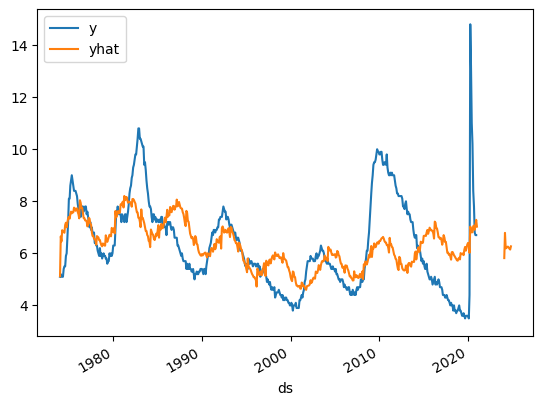

In [230]:
pd.concat([ny_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

forecast_period = 121
future =pd.date_range(start='2014-01-01', periods=forecast_period, freq='M')
future=pd.DataFrame(future,columns=['ds'])

C:\Users\lenovo\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\lenovo\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



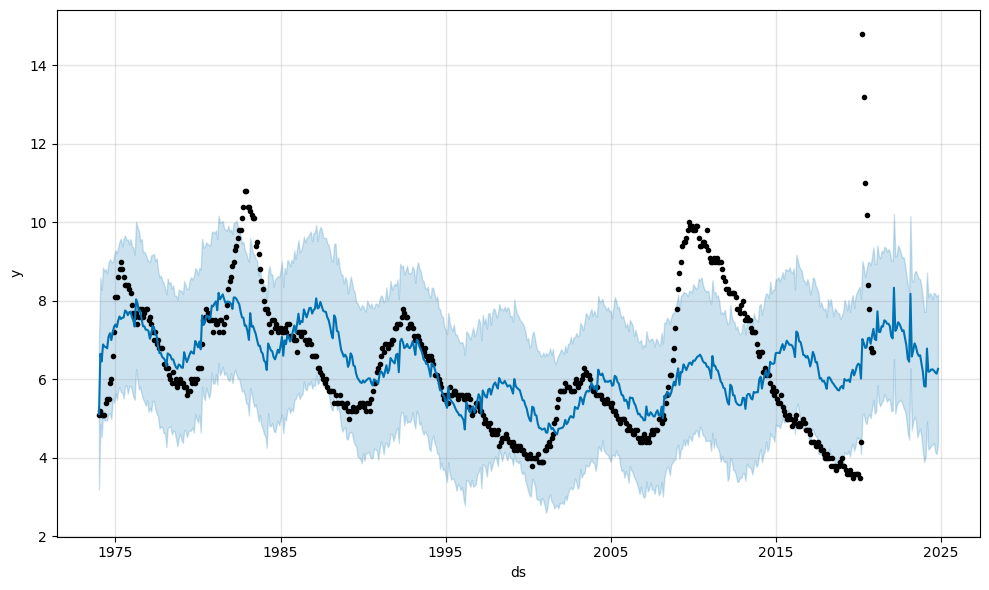

In [231]:
fig1 = m.plot(forecast)

In [182]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
596,2023-08-31,6.599115,4.678637,8.496035
597,2023-09-30,6.616290,4.730244,8.404324
598,2023-10-31,6.392530,4.331261,8.230815
599,2023-11-30,6.191463,4.375511,8.076306
600,2023-12-31,5.826552,3.864931,7.786383


C:\Users\lenovo\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

C:\Users\lenovo\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



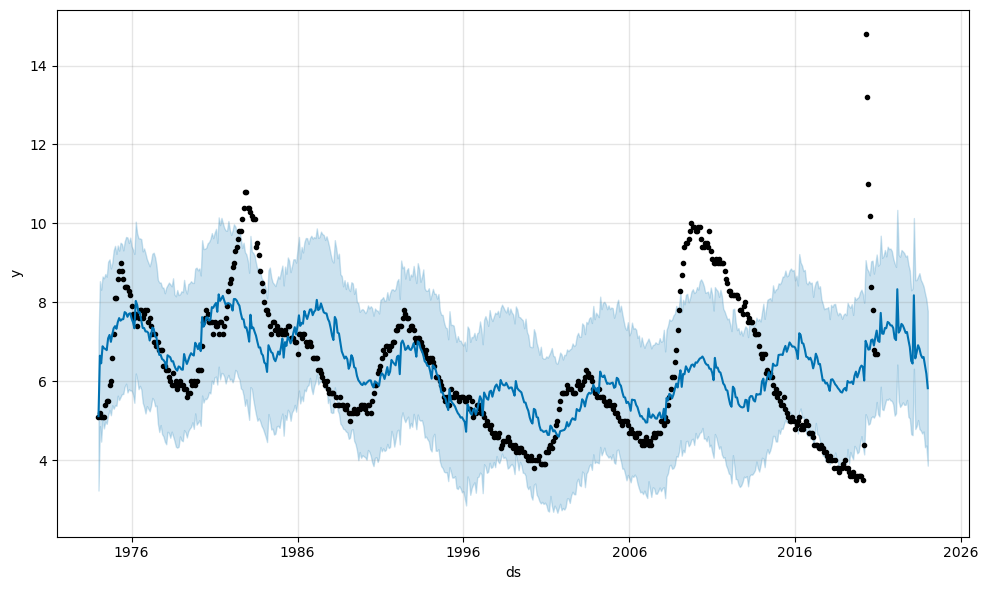

In [183]:
fig1 = m.plot(forecast)


<Axes: xlabel='ds'>

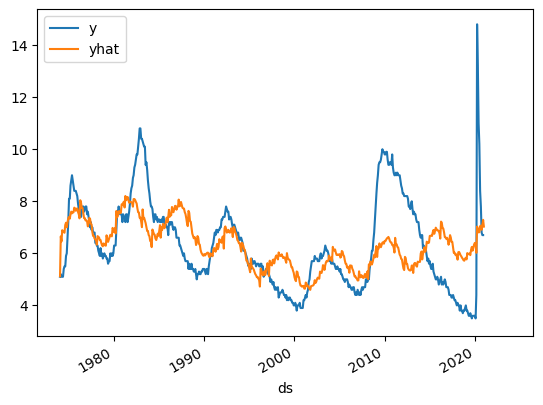

In [184]:
pd.concat([ny_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [185]:
from statsmodels.tools.eval_measures import rmse

# Score

In [186]:
predictions = forecast.iloc[-121:]['yhat']
predictions = predictions[:len(test_data['y'])]
test_data['y'] = test_data['y'][:len(predictions)]

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8368\3600218961.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [187]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test_data['y']))
print("Mean Value of Test Dataset:", test_data['y'].mean())

Root Mean Squared Error between actual and  predicted values:  2.713498281646738
Mean Value of Test Dataset: 4.1891891891891895


# more forcast

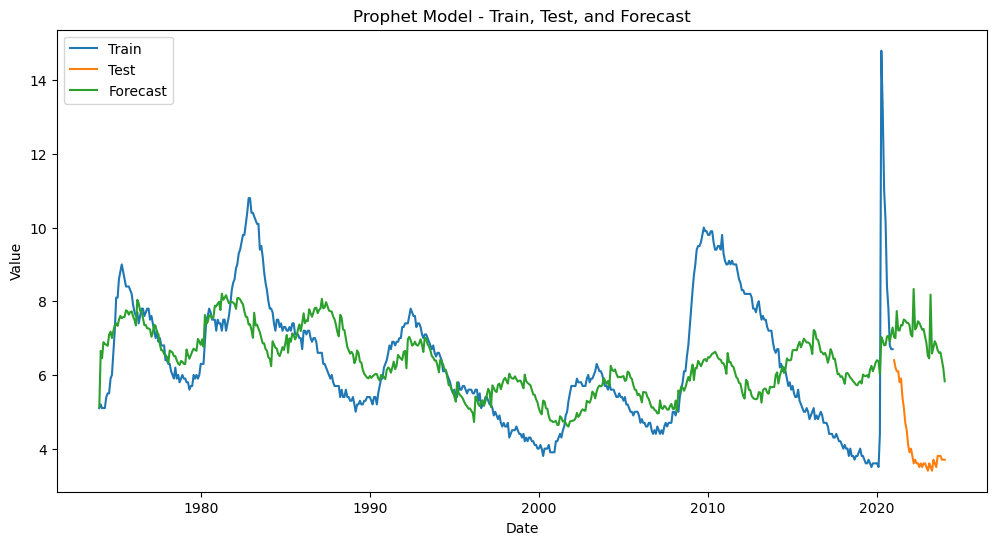

In [188]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train_data['ds'], train_data['y'], label='Train')
plt.plot(test_data['ds'], test_data['y'], label='Test')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Model - Train, Test, and Forecast')
plt.show()


# future forcast

In [189]:
total_months_to_forecast = (2024 - 2021) * 12 + 1 + 12
future = m.make_future_dataframe(periods=total_months_to_forecast,freq='M')

In [190]:
future

,ds
0,1974-01-01
1,1974-02-01
2,1974-03-01
3,1974-04-01
4,1974-05-01
...,...
608,2024-08-31
609,2024-09-30
610,2024-10-31
611,2024-11-30


# SARIMA Model

In [191]:
train=train_data.set_index('ds')

In [192]:
test=test_data.set_index('ds')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima = SARIMAX(train_data,order=(2,1,20), seasonal_order=(1, 1, 1, 120),
                                 enforce_stationarity=False, enforce_invertibility=False)

In [ ]:
fitted = sarima.fit()
print(fitted.summary())


In [194]:
pred_test = fitted.predict(start=test.index.min(), end=test.index.max())

In [207]:
forcast_data=fitted.predict(start=test.index.max(), end=test.index.max() + pd.DateOffset(months=10))

In [198]:
pred_test=pred_test.reset_index()

In [199]:
pred_test

,level_0,index,predicted_mean
0,0,2021-01-01,8.173899
1,1,2021-02-01,8.822480
2,2,2021-03-01,6.909160
3,3,2021-04-01,5.996796
4,4,2021-05-01,4.795290
5,5,2021-06-01,3.045547
6,6,2021-07-01,4.191546
7,7,2021-08-01,3.669067
8,8,2021-09-01,3.253063
9,9,2021-10-01,4.894993


# SARIMA over test data

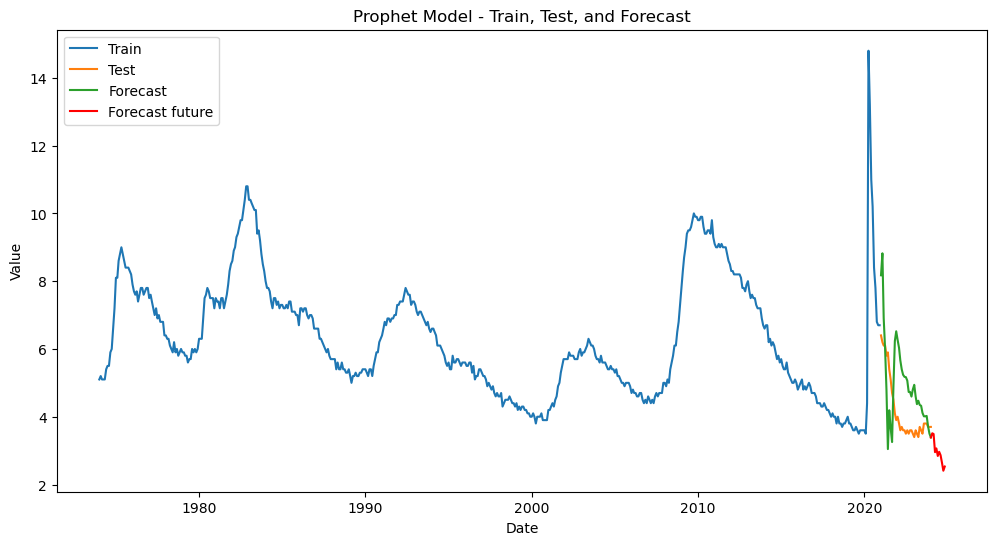

In [210]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred_test['index'], pred_test['predicted_mean'], label='Forecast')
plt.plot(forcast_data.index, forcast_data, label='Forecast future',color='red')

plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Prophet Model - Train, Test, and Forecast')
plt.show()


In [ ]:
#Score

In [201]:
predictions = pred_test['predicted_mean']
predictions = predictions[:len(test_data)]
test_data= test_data[:len(predictions)]
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test_data['y']))
print("Mean Value of Test Dataset:", test_data['y'].mean())

Root Mean Squared Error between actual and  predicted values:  1.4402700067319099
Mean Value of Test Dataset: 4.1891891891891895


In [100]:

import pickle
pickle.dump(sarima,open('sarima.pkl','wb'))

In [370]:
pickle.dump(m,open('fbProfet.pkl','wb'))

In [209]:
pickle.dump(fitted,open('fitted.pkl','wb'))